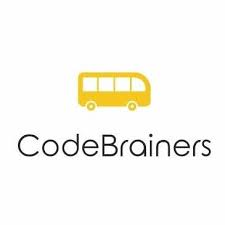

# SQL - Podstawowy

_Mikołaj Leszczuk_

* Warunki rozbudowane – operacja `SELECT.. WHERE`
* Klauzula `TOP`
* Aliasy – zastępcze nazwy kolumn lub tabeli
* Funkcje grupujące
* Klauzula `DISTINCT`
* Funkcje daty

## Warunki rozbudowane – operacja `SELECT.. WHERE`

W kursie początkującym poznaliśmy już zapytanie `SELECT` oraz jego rozszerzenie o klauzulę `WHERE`. Tutaj, postaramy się rozszerzyć naszą wiedzę o inne operatory porównania używane w tej klauzuli.

### Operatory `AND`, `OR`, `NOT`

Dzięki nim możemy stworzyć złożone warunki logiczne. Są to odpowiedniki matematycznej koniunkcji, alternatywy i negacji.

* `AND`	– oba warunki muszą być spełnione
* `OR`	– wystarczy, że jeden będzie spełniony
* `NOT`	– negacja warunku

``` sql
SELECT kolumna,kolumna,.. FROM tabelaWHERE NOT kolumna=wartość AND kolumna=wartość OR kolumna=wartość;
```

Możliwe jest również używanie nawiasów w warunkach. Operatoryw nawiasach są wykonywane jako pierwsze a następnie ich wynik jest przekazywany poza nawias.

#### Przykład

**Wybieramy dane użytkownika który ma na imię `Katarzyna` i mieszka w mieście `Lublin`**

Tabela **`Customer`**:

|     id    |        name      |      city       |        date       |
|:---------:|:----------------:|:---------------:|:-----------------:|
|     1     |     Adam         |     Lublin      |     2011-02-05    |
|     2     |     Monika       |     Gdynia      |     2011-02-19    |
|     3     |     Natalia      |     Zakopane    |     2011-02-23    |
|     4     |     Katarzyna    |     Lublin      |     2011-02-23    |
|     5     |     Marcin       |     Warszawa    |     2011-03-21    |

---

Zapytanie:

``` sql
SELECT id,name,city,date FROM customer WHERE name='Katarzyna' AND city='Lublin';
```

Wynik zapytania:

|     id    |        name      |     city       |        date       |
|:---------:|:----------------:|:--------------:|:-----------------:|
|     4     |     Katarzyna    |     Lublin     |     2011-02-23    |

#### Ćwiczenie

**Wybierz wszystkie dane produktów z tabeli `Product`, których cena jest większa od `25` lub liczba sztuk jest nie mniejsza niż `5`**

Tabela **`Product`**:

|     id    |       name     |     price    |     amount    |        date       |
|:---------:|:--------------:|:------------:|:-------------:|:-----------------:|
|     5     |     Spodnie    |     100      |     5         |     2011-02-01    |
|     6     |     Bluza      |     60       |     2         |     2011-02-12    |

Wpisz zapytanie do bazy!

---

Zapytanie:

```sql
SELECT id,name,price,amount,date FROM product WHERE price>25 OR amount>=5;
```

Wynik zapytania:

|     id    |       name     |     price    |     amount    |        date       |
|:---------:|:--------------:|:------------:|:-------------:|:-----------------:|
|     5     |     Spodnie    |     100      |     5         |     2011-02-01    |
|     6     |     Bluza      |     60       |     2         |     2011-02-12    |

### Operator `LIKE`

Umożliwia przeszukiwanie danych tekstowych na podstawie wzorca podanego w klauzuli warunkowej. Może być to zarówno dokładny ciąg poszukiwanych znaków jak i wyrażenie stworzone przy pomocy następujących symboli:

* Symbol `%` zastępuje dowolny ciąg znaków
* Symbol `_` zastępuje dowolny pojedynczy znak

```sql
SELECT kolumna,kolumna,.. FROM tabelaWHERE kolumna LIKE 'wyrażenie';
```

#### Przykład

**Wybieramy dane użytkownika których imię rozpoczyna się literą `M`**

Tabela **`Customer`**:

|     id    |        name      |      city       |        date       |
|:---------:|:----------------:|:---------------:|:-----------------:|
|     1     |     Adam         |     Lublin      |     2011-02-05    |
|     2     |     Monika       |     Gdynia      |     2011-02-19    |
|     3     |     Natalia      |     Zakopane    |     2011-02-23    |
|     4     |     Katarzyna    |     Lublin      |     2011-02-23    |
|     5     |     Marcin       |     Warszawa    |     2011-03-21    |

---

Zapytanie:

```sql
SELECT id,name,city,date FROM customer WHERE name LIKE 'M%';
```

Wynik zapytania:

|     id    |      name     |      city       |        date       |
|:---------:|:-------------:|:---------------:|:-----------------:|
|     2     |     Monika    |     Gdynia      |     2011-02-19    |
|     5     |     Marcin    |     Warszawa    |     2011-03-21    |

#### Ćwiczenie

**Wybierz id, nazwę i cenę produktów z tabeli Product które zawierają w nazwie literę “`a`”**

Tabela **`Product`**:

|     id    |       name     |     price    |     amount    |        date       |
|:---------:|:--------------:|:------------:|:-------------:|:-----------------:|
|     5     |     Spodnie    |     100      |     5         |     2011-02-01    |
|     6     |     Bluza      |     60       |     2         |     2011-02-12    |

Wpisz zapytanie do bazy!

---

Zapytanie:

```sql
SELECT id,name,price FROM product WHERE name LIKE '%a%';
```

Wynik zapytania:

|     id    |      name    |     price    |
|:---------:|:------------:|:------------:|
|     6     |     Bluza    |     60       |

### Operator `IN`

Operator `IN` sprawdza czy wartości z kolumny znajdują się w zbiorze podanym zaraz bo klauzuli `IN`.

```sql
SELECT kolumna,kolumna,.. FROM tabelaWHERE kolumna IN (element zb.,element zb.,..);
```

#### Przykład

**Wybieramy nazwy i ceny produktów których cena wynosi `45` lub `10` lub `25`**

Tabela **`Product`**:

|     id    |       name     |     price    |     amount    |        date       |
|:---------:|:--------------:|:------------:|:-------------:|:-----------------:|
|     5     |     Spodnie    |     100      |     5         |     2011-02-01    |
|     6     |     Bluza      |     60       |     2         |     2011-02-12    |

---

Zapytanie:

```sql
SELECT name,price FROM product WHERE price IN (45,10,25);
```

Wynik zapytania:

|     name    |     price    |
|:-----------:|:------------:|

#### Ćwiczenie

**Wybierz nazwę, cenę i liczbę produktów z tabeli `Product`, których liczba to `3`, `4`, `5` lub `6`**

Tabela **`Product`**:

|     id    |       name     |     price    |     amount    |        date       |
|:---------:|:--------------:|:------------:|:-------------:|:-----------------:|
|     5     |     Spodnie    |     100      |     5         |     2011-02-01    |
|     6     |     Bluza      |     60       |     2         |     2011-02-12    |

Wpisz zapytanie do bazy!

---

Zapytanie:

```sql
SELECT name,price,amount FROM product WHERE amount IN (3,4,5,6);
```

Wynik zapytania:

|       name     |     price    |     amount    |
|:--------------:|:------------:|:-------------:|
|     Spodnie    |     100      |     5         |

### Operator `BETWEEN`

Operator `BETWEEN` sprawdza czy wartości z kolumny znajdują się w przedziale podanym zaraz po klauzuli `BETWEEN`.

```sql
SELECT kolumna,kolumna,.. FROM tabelaWHERE kolumna BETWEEN wartość1 AND wartość2;
```

#### Przykład

**Wybieramy nazwę i cenę produktów których cena należy do przedziału `40` do `60`**

Tabela **`Product`**:

|     id    |       name     |     price    |     amount    |        date       |
|:---------:|:--------------:|:------------:|:-------------:|:-----------------:|
|     5     |     Spodnie    |     100      |     5         |     2011-02-01    |
|     6     |     Bluza      |     60       |     2         |     2011-02-12    |

---

Zapytanie:

```sql
SELECT name,price FROM product WHERE price BETWEEN 40 AND 60;
```

Wynik zapytania:

|      name    |     price    |
|:------------:|:------------:|
|     Bluza    |     60       |

### Operator `IS NULL`

Umożliwia wybranie rekordów ze względu na nie-przypisaną wartość w jednej z jego kolumn.

```sql
SELECT kolumna,kolumna,.. FROM tabela WHERE kolumna IS NULL;
```

## Klauzula `TOP`

Pozwala ona ograniczyć ilość wybieranych wierszy do podanej liczby. Umieszcza się ją bezpośrednio po instrukcji `SELECT`.

```sql
SELECT TOP liczba kolumna,kolumna,.. FROM tabela;
```

Możliwe jest również wybieranie części rekordów na podstawie procentowej.

Pomiędzy instrukcjami `TOP` i `PERCENT` musimy wstawić liczbę określającą ile procent wyników chcemy otrzymać oraz użyć sortowania `ORDER BY`.

```sql
SELECT TOP liczba PERCENT kolumna,kolumna,.. FROM tabelaORDER BY kolumna;
```

### Odpowiednik klauzuli `TOP` w MySQL i SQLite to klauzula `LIMIT`

Podobnie jak `TOP`, klauzula `LIMIT` zwróci nam podaną ilość oczekiwanych wyników, jednak w tym wypadku możemy podać również, od którego wiersza ma się to zwracanie rozpoczynać.

```sql
SELECT kolumna FROM tabelaLIMIT od którego wiersza,liczba wierszy;
```

#### Przykład

**Wybieramy id, nazwę i cenę jednego produktu którego cena jest wyższa niż `20`**

Tabela **`Product`**:

|     id    |       name     |     price    |     amount    |        date       |
|:---------:|:--------------:|:------------:|:-------------:|:-----------------:|
|     5     |     Spodnie    |     100      |     5         |     2011-02-01    |
|     6     |     Bluza      |     60       |     2         |     2011-02-12    |

---

Zapytanie:

```sql
SELECT id,name,price FROM product WHERE price>20 LIMIT 1;
```

Wynik zapytania:

|     id    |       name     |     price    |
|:---------:|:--------------:|:------------:|
|     5     |     Spodnie    |     100      |

#### Ćwiczenie

**Wybierz id i imię `4` pierwszych klientów korzystając z klauzuli `LIMIT`**

Tabela **`Customer`**:

|     id    |        name      |      city       |        date       |
|:---------:|:----------------:|:---------------:|:-----------------:|
|     1     |     Adam         |     Lublin      |     2011-02-05    |
|     2     |     Monika       |     Gdynia      |     2011-02-19    |
|     3     |     Natalia      |     Zakopane    |     2011-02-23    |
|     4     |     Katarzyna    |     Lublin      |     2011-02-23    |
|     5     |     Marcin       |     Warszawa    |     2011-03-21    |

Wpisz zapytanie do bazy!

---

Zapytanie:

```sql
SELECT id,name FROM customer LIMIT 0,4;
```

Wynik zapytania:

|     id    |        name      |
|:---------:|:----------------:|
|     1     |     Adam         |
|     2     |     Monika       |
|     3     |     Natalia      |
|     4     |     Katarzyna    |

## Aliasy – zastępcze nazwy kolumn lub tabeli

Alias to nazwa zastępcza, którą możemy zdefiniować dla konkretnej kolumny lub tabeli na początku zapytania, a następnie używać w całym zapytaniu jako wygodniejsza (zazwyczaj dużo krótsza) nazwa.

Alias definiuje się używając klauzuli “`AS`” zaraz po nazwie kolumny lub tabeli w następujący sposób:

```sql
SELECT kolumna AS kol FROM tabela AS tabWHERE tab.kol=wartość;
```

Od momentu takiej definicji do kolumny kolumna wystarczy odwoływać się aliasem `kol` a tabeli tabela aliasem `tab`.

Do kolumny w konkretnej tabeli odwołujemy się za pomocąoperatora kropki “`.`”. Jest to szczególnie istotne w zapytaniach, w których korzysta się z więcej niż jednej tabeli.

Aliasy znajdują praktyczne zastosowanie w bardziej złożonych zapytaniach np. Korzystających ze złączenia tabel czy podzapytania.

Korzystanie z aliasów przy łączeniu tabel zostanie omówione na poziomie zaawansowanym 

## Funkcje grupujące

Są to funkcje umożliwiające wykonanie pożądanych operacji na całych tabelach lub tylko niektórych zbiorach danych, zwracające ogólne wyniki dotyczące np. liczebności czy średnich wartości.

### `COUNT()`

Zwraca liczbę przekazanych wartości. Jest to po prostu liczba elementów w podanym zbiorze

```sql
SELECT COUNT(kolumna) FROM tabela;
```

Może służyć do zliczenia ilości rekordów w tabeli.

#### Przykład

**Liczymy ile produktów jest w tabeli `Product`**

Tabela **`Product`**:

|     id    |       name     |     price    |     amount    |        date       |
|:---------:|:--------------:|:------------:|:-------------:|:-----------------:|
|     5     |     Spodnie    |     100      |     5         |     2011-02-01    |
|     6     |     Bluza      |     60       |     2         |     2011-02-12    |

---

Zapytanie:

```sql
SELECT COUNT(name) FROM product;
```

Wynik zapytania:

|     COUNT(name)    |
|:------------------:|
|     2              |

### `SUM()`

Zwraca sumę wartości podanego zbioru

```mysql
SELECT SUM(kolumna);
```

Musimy uważać aby argumentem były zawsze liczby.

#### Przykład

**Wybieramy sumę wszystkich sztuk z tabeli `Product`**

Tabela **`Product`**:

|     id    |       name     |     price    |     amount    |        date       |
|:---------:|:--------------:|:------------:|:-------------:|:-----------------:|
|     5     |     Spodnie    |     100      |     5         |     2011-02-01    |
|     6     |     Bluza      |     60       |     2         |     2011-02-12    |

---

Zapytanie:

```mysql
SELECT SUM(amount) FROM product;
```

Wynik zapytania:

|     SUM(amount)    |
|:------------------:|
|     7              |

#### Ćwiczenie

**Znajdź sumę cen jednostkowych wszystkich produktów**

Tabela **`Product`**:

|     id    |       name     |     price    |     amount    |        date       |
|:---------:|:--------------:|:------------:|:-------------:|:-----------------:|
|     5     |     Spodnie    |     100      |     5         |     2011-02-01    |
|     6     |     Bluza      |     60       |     2         |     2011-02-12    |

Wpisz zapytanie do bazy!

---

Zapytanie:

```mysql
SELECT SUM(price) FROM product;
```

Wynik zapytania:

|     SUM(price)    |
|:-----------------:|
|     160.0         |

### `AVG()`

Zwraca średnią wartość z podanego zbioru

```mysql
SELECT AVG(kolumna);
```

Musimy uważać aby argumentem były zawsze liczby.

#### Przykład

**Liczymy średnią cenę w tabeli `Product`**

Tabela **`Product`**:

|     id    |       name     |     price    |     amount    |        date       |
|:---------:|:--------------:|:------------:|:-------------:|:-----------------:|
|     5     |     Spodnie    |     100      |     5         |     2011-02-01    |
|     6     |     Bluza      |     60       |     2         |     2011-02-12    |

---

Zapytanie:

```mysql
SELECT AVG(price) FROM product;
```

Wynik zapytania:

|     AVG(price)    |
|:-----------------:|
|     80.0          |

#### Ćwiczenie

**Oblicz średnią liczbę produktów z tabeli `Product`, których cena jest wyższa od `40`**

Tabela **`Product`**:

|     id    |       name     |     price    |     amount    |        date       |
|:---------:|:--------------:|:------------:|:-------------:|:-----------------:|
|     5     |     Spodnie    |     100      |     5         |     2011-02-01    |
|     6     |     Bluza      |     60       |     2         |     2011-02-12    |

Wpisz zapytanie do bazy!

---

Zapytanie:

```mysql
SELECT AVG(amount) FROM product WHERE price>40;
```

Wynik zapytania:

|     AVG(amount)    |
|:------------------:|
|     3.5            |

### `MIN()`

Zwraca najmniejszą wartość z podanego zbioru

```mysql
SELECT MIN(kolumna);
```

Argumentami mogą być liczby, dane tekstowe i daty z czasem.

#### Przykład

**Wybieramy id i cenę produktu o najniższej cenie**

Tabela **`Product`**:

|     id    |       name     |     price    |     amount    |        date       |
|:---------:|:--------------:|:------------:|:-------------:|:-----------------:|
|     5     |     Spodnie    |     100      |     5         |     2011-02-01    |
|     6     |     Bluza      |     60       |     2         |     2011-02-12    |

---

Zapytanie:

```mysql
SELECT id,MIN(price) FROM product;
```

Wynik zapytania:

|     id    |     MIN(price)    |
|:---------:|:-----------------:|
|     6     |     60.0          |

### `MAX()`

Zwraca największą wartość z podanego zbioru

```mysql
SELECT MAX(kolumna);
```

Argumentami mogą być liczby, dane tekstowe i daty z czasem.

## Klauzula `DISTINCT`

### Klauzula `DISTINCT`

Zwraca w wyniku rekordy bez powtórzeń

```sql
SELECT DISTINCT(kolumna) FROM tabela;
```

#### Przykład

**Zwracamy w wyniku miasta bez powtórzeń**

Tabela **`Customer`**:

|     id    |        name      |      city       |        date       |
|:---------:|:----------------:|:---------------:|:-----------------:|
|     1     |     Adam         |     Lublin      |     2011-02-05    |
|     2     |     Monika       |     Gdynia      |     2011-02-19    |
|     3     |     Natalia      |     Zakopane    |     2011-02-23    |
|     4     |     Katarzyna    |     Lublin      |     2011-02-23    |
|     5     |     Marcin       |     Warszawa    |     2011-03-21    |

---

Zapytanie:

```sql
SELECT DISTINCT city FROM customer;
```

Wynik zapytania:

|      city       |
|:---------------:|
|     Lublin      |
|     Gdynia      |
|     Zakopane    |
|     Warszawa    |

### Użycie w agregatach

Może być także użyte w agregatach, np.:

```sql
SELECT COUNT(DISTINCT kolumna) FROM tabela;
```

#### Przykład

**Zwracamy w wyniku liczbę miast bez powtórzeń**

Tabela **`Customer`**:

|     id    |        name      |      city       |        date       |
|:---------:|:----------------:|:---------------:|:-----------------:|
|     1     |     Adam         |     Lublin      |     2011-02-05    |
|     2     |     Monika       |     Gdynia      |     2011-02-19    |
|     3     |     Natalia      |     Zakopane    |     2011-02-23    |
|     4     |     Katarzyna    |     Lublin      |     2011-02-23    |
|     5     |     Marcin       |     Warszawa    |     2011-03-21    |

---

Zapytanie:

```sql
SELECT COUNT(DISTINCT city) FROM customer;
```

Wynik zapytania:

|     COUNT(DISTINCT   city)     |
|:------------------------------:|
|     4                          |

## Funkcje daty

### Funkcje daty SQL

Umożliwiają operacje na dacie i czasie w trakcie wykonywania zapytania. Typowe funkcje to:

`DAY()`, `MONTH()`, `YEAR()`

Zwracają kolejno dzień, miesiąc, rok z podanej w argumencie daty

```sql
SELECT DAY(data);
```

### Funkcje daty SQLite

Umożliwiają operacje na dacie i czasie w trakcie wykonywania zapytania. Typowe funkcje to:

`strftime('%d')`, `strftime('%m')`, `strftime('%Y')`

Zwracają kolejno dzień, miesiąc, rok z podanej w argumencie daty

```sql
SELECT strftime('%d',data);
```

#### Przykład

**Wybieramy id, imiona i daty dodania klientów którzy zarejestrowali się w lutym!**

Tabela **`Customer`**:

|     id    |        name      |      city       |        date       |
|:---------:|:----------------:|:---------------:|:-----------------:|
|     1     |     Adam         |     Lublin      |     2011-02-05    |
|     2     |     Monika       |     Gdynia      |     2011-02-19    |
|     3     |     Natalia      |     Zakopane    |     2011-02-23    |
|     4     |     Katarzyna    |     Lublin      |     2011-02-23    |
|     5     |     Marcin       |     Warszawa    |     2011-03-21    |

---

Zapytanie:

```sql
SELECT id,name,date FROM customer WHERE STRFTIME('%m',date)='02';
```

Wynik zapytania:

|     id    |       name     |        date       |
|:---------:|:--------------:|:-----------------:|
|     1     |     Adam       |     2011-02-05    |
|     2     |     Monika     |     2011-02-19    |
|     3     |     Natalia    |     2011-02-23    |

#### Ćwiczenie

**Wybierz nazwę, cenę i datę dodania produktów z tabeli `Product`, których dzień dodania należy do przedziału od `1` do `10`**

Tabela **`Product`**:

|     id    |       name     |     price    |     amount    |        date       |
|:---------:|:--------------:|:------------:|:-------------:|:-----------------:|
|     5     |     Spodnie    |     100      |     5         |     2011-02-01    |
|     6     |     Bluza      |     60       |     2         |     2011-02-12    |

Wpisz zapytanie do bazy!

---

Zapytanie:

```sql
SELECT name,price,date FROM product WHERE STRFTIME('%d',date) BETWEEN '01' AND '10';
```

Wynik zapytania:

|       name     |     price    |        date       |
|:--------------:|:------------:|:-----------------:|
|     Spodnie    |     100      |     2011-02-01    |

### `GETDATE()`

Zwraca bieżącą datę i czas - SQL

```sql
SELECT GETDATE();
```

### `DATE('now')`

Zwraca bieżącą datę i czas - SQLite

```sql
SELECT DATE('now');
```

### `DATEDIFF()`

Zwraca liczbę podanych jednostek pomiędzy podanymi datami - SQL

```sql
SELECT DATEDIFF(DAY,'20110210','20110310');
```

### `JULIANDAY()-JULIANDAY()`

Zwraca liczbę podanych dni pomiędzy podanymi datami - SQLite

```sql
SELECT JULIANDAY('2011-02-10')-JULIANDAY('2011-03-10');
```

## Dziękuję za uwagę